Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [2]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
y.unique()

array([5., 0., 4., 1., 9., 2., 3., 6., 7., 8.])

In [4]:
y.value_counts() / y.shape

1.0    0.112529
7.0    0.104186
3.0    0.102014
2.0    0.099857
9.0    0.099400
0.0    0.098614
6.0    0.098229
8.0    0.097500
4.0    0.097486
5.0    0.090186
Name: class, dtype: float64

In [5]:
# divisão do dataset em treino e teste

Xtrain, ytrain, Xtest, ytest = X[:55000], y[:55000], X[55000:], y[55000:]

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
# tratamento da variável target, definindo como valor negativo (0) os dígitos ímpares e positivo(1) os dígitos pares

ytrain = np.where(ytrain%2==0,1,0)
ytest = np.where(ytest%2==0,1,0)

In [9]:
print ("Percentual classe positiva: ", round(ytrain.sum()/ytrain.size*100,2))
print ("Percentual classe negativa: ", round((ytrain.size - ytrain.sum())/ytrain.size*100,2))

Percentual classe positiva:  49.15
Percentual classe negativa:  50.85


Dataset está balanceado entre as duas classes

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
logreg = LogisticRegression()

In [13]:
from sklearn.model_selection import KFold

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
from sklearn.metrics import roc_curve

In [16]:
from sklearn.model_selection import KFold

In [17]:
import time

In [18]:
# definição de função para implementação de validação cruzada manual

def validacao_cruzada (classificador,nome_classificador, X, y, n_folds, metrica, nome_metrica):
    t0 = time.time()
    metricas_treino = []
    metricas_val = []
    kf = KFold(n_splits=n_folds)
    for ind_treino, ind_val in kf.split(X, y):
        Xtrain_folds = X.iloc[ind_treino]
        ytrain_folds = y[ind_treino]
        Xval_folds = X.iloc[ind_val]
        yval_folds = y[ind_val]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        prob_class1_treino = classificador.predict_proba(Xtrain_folds)[:,1]
        prob_class1_val = classificador.predict_proba(Xval_folds)[:,1]
        
        metricas_treino.append(metrica(y_true = ytrain_folds, y_score = prob_class1_treino))
        metricas_val.append(metrica(y_true = yval_folds, y_score = prob_class1_val))
    
    t1=time.time()
    print ("Modelo: ", nome_classificador)
    print ("Métrica: ", nome_metrica)
    print ("Média treino: ", np.mean(metricas_treino))
    print ("Média validação: ", np.mean(metricas_val))
    print ("Tempo: ", np.round(t1-t0,2), " segundos")

In [19]:
# avaliação da Regressão Logística pela métrica da área sob curva ROC

validacao_cruzada (classificador = LogisticRegression(), nome_classificador = "Regressão Logística",
                   X = Xtrain, y = ytrain, n_folds = 5,
                   metrica = roc_auc_score, nome_metrica = "AUC")

Modelo:  Regressão Logística
Métrica:  AUC
Média treino:  0.9602742295877791
Média validação:  0.956004305059688
Tempo:  32.1  segundos


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# avaliação do KNN Classifier com 5 vizinhos

validacao_cruzada (classificador = KNeighborsClassifier(n_neighbors=5), nome_classificador="KNN Classifier K=5",
                   X = Xtrain, y = ytrain, n_folds = 5,
                   metrica = roc_auc_score, nome_metrica = "AUC")

Modelo:  KNN Classifier K=5
Métrica:  AUC
Média treino:  0.9995899934932095
Média validação:  0.9951338603973472
Tempo:  467.99  segundos


In [22]:
# avaliação do KNN Classifier com 7 vizinhos

validacao_cruzada (classificador = KNeighborsClassifier(n_neighbors=7), nome_classificador="KNN Classifier K=7",
                   X = Xtrain, y = ytrain, n_folds = 5,
                   metrica = roc_auc_score, nome_metrica = "AUC")

Modelo:  KNN Classifier K=7
Métrica:  AUC
Média treino:  0.9994199209011339
Média validação:  0.9957056408184467
Tempo:  484.5  segundos


In [23]:
# avaliação do KNN Classifier com 3 vizinhos

validacao_cruzada (classificador = KNeighborsClassifier(n_neighbors=3), nome_classificador="KNN Classifier K=3",
                   X = Xtrain, y = ytrain, n_folds = 5,
                   metrica = roc_auc_score, nome_metrica = "AUC")

Modelo:  KNN Classifier K=3
Métrica:  AUC
Média treino:  0.9997691929801459
Média validação:  0.9929286112314305
Tempo:  424.72  segundos


In [24]:
# avaliação do KNN Classifier com 10 vizinhos


validacao_cruzada (classificador = KNeighborsClassifier(n_neighbors=10), nome_classificador="KNN Classifier K=10",
                   X = Xtrain, y = ytrain, n_folds = 5,
                   metrica = roc_auc_score, nome_metrica = "AUC")

Modelo:  KNN Classifier K=10
Métrica:  AUC
Média treino:  0.9992027149544151
Média validação:  0.9962355466658014
Tempo:  490.29  segundos


Escolhemos o modelo com K=7 para comparação com o Regressão Logística

In [25]:
# treinar novamente os modelos com o dataset de treino completo e capturar os dados para traçado das curvas ROC
# a partir do resultados das predições feitas sobre o dataset de teste

logreg.fit(Xtrain, ytrain)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:,1])

knnc7 = KNeighborsClassifier(n_neighbors=7)
knnc7.fit(Xtrain, ytrain)
fpr_knn7, tpr_knn7, thresholds_knn7 = roc_curve(y_true = ytest, y_score = knnc7.predict_proba(Xtest)[:,1])

In [26]:
# obtenção da métrica final a partir das predições feitas em teste

auc_lr = round(roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:,1]),5)
auc_knn7 = round(roc_auc_score(y_true = ytest, y_score = knnc7.predict_proba(Xtest)[:,1]),5)

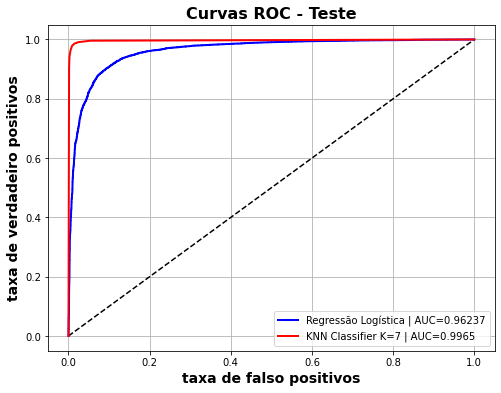

In [27]:
# plotagem das curvas comparativas ROC dos dois algoritmos

plt.figure(figsize=[8,6])
plt.title("Curvas ROC - Teste", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

plt.plot(fpr_lr, tpr_lr, c = 'blue', lw = 2, label="Regressão Logística | AUC="+str(auc_lr))
plt.plot(fpr_knn7, tpr_knn7, c = 'red', lw = 2, label="KNN Classifier K=7 | AUC="+str(auc_knn7))
        
plt.legend()
plt.grid()
plt.show()

Neste caso, o KNN Classifier teve desemepenho superior à Regressão Logística, observável nos valores de AUC
e evidenciados pelo formato da curva, muito mais próxima da curva perfeita em "L" invertido